* #### Importing the necessary libraries

In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [505]:
data = pd.read_csv("3.data")

## Task A
* $$\hat{\mu}_1 = \frac{x_1 + ... + x_n}{n}$$
* $$\hat{\mu}_2 = \frac{x_1^2 + ... + x_n^2}{n}$$

In [506]:
first_moment = np.mean(data)
print("First Moment:", first_moment)
second_moment = np.mean(data**2)
print("Second Moment:", second_moment)

First Moment: 6.496121071257862
Second Moment: 46.55447234919477


## Task B

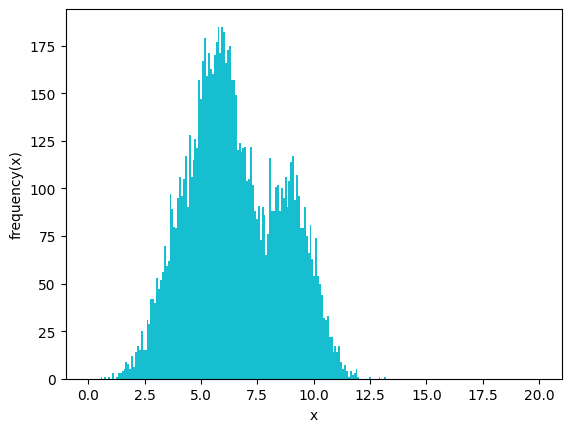

In [507]:
X = data
bins = np.linspace(np.min(data), np.max(data), 150)
Range = (np.min(data), np.max(data))
fig, ax = plt.subplots()
ax.hist(x=X, bins=bins, range=Range, color='#17becf')
plt.xlabel("x")
plt.ylabel("frequency(x)")
plt.xlim(-1, 21)
fig.savefig("3a.png")
plt.show()

## Task C
Using fsolve to find the parameters of Binomial distribution by equating first two moments of the distribution with that of the dataset.

In [508]:
def fit_binomial(params):
    n, p = params
    rel1 = n*p - first_moment
    rel2 = n*(n-1)*(p**2) + n*p - second_moment
    return [ rel1, rel2 ]

initial_guess = [10, 0.5]
n, p = scipy.optimize.fsolve(fit_binomial, initial_guess)

n_floor = np.floor(n)
n_ceil = np.ceil(n)

if np.sum(np.abs(fit_binomial([n_floor, p]))) < np.sum(np.abs(fit_binomial([n_ceil, p]))):
    nstar = n_floor
else:
    nstar = n_ceil
pstar = p
print("n*:", nstar, "\np*:", pstar)

n*: 20.0 
p*: 0.3296178859685077


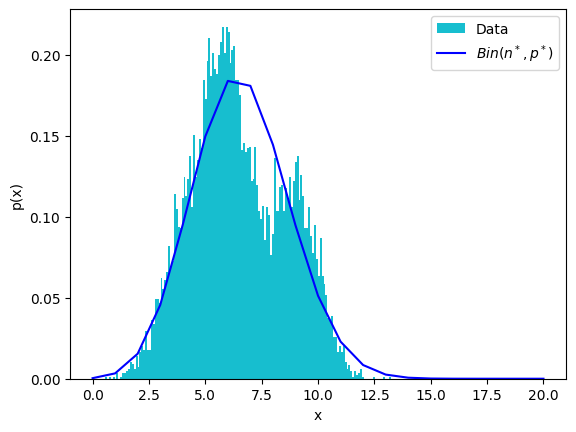

In [509]:
X = data
bins = np.linspace(np.min(data), np.max(data), 150)
Range = (np.min(data), np.max(data))

# plotting binomial
x_points = np.arange(0, 21, step=20/nstar)
Y_val_binom = scipy.stats.binom.pmf(np.arange(0, int(nstar)+1), n=nstar, p=pstar)

plt.hist(x=X, bins=bins, range=Range, color='#17becf', density=True, label='Data')
plt.plot(x_points, Y_val_binom, color='blue', label=r'$Bin(n^*, p^*)$')
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend(loc='upper right')
plt.show()

## Task D
Using fsolve to find the parameters of Gamma distribution by equating first two moments of the distribution with that of the dataset.

In [510]:
def fit_gamma(params):
    k, theta = params
    rel1 = k * theta - first_moment
    rel2 = k * (k+1) * (theta**2) - second_moment
    return [rel1, rel2]

initial_guess = [6, 0.6]
k, theta = scipy.optimize.fsolve(fit_gamma, initial_guess)
print("k:", k, "\ntheta:", theta)

k: 9.69017659525684 
theta: 0.6703821140307613


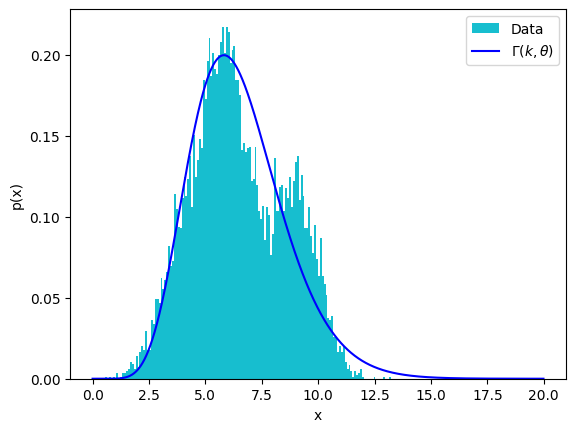

In [511]:
X = data
bins = np.linspace(np.min(data), np.max(data), 150)
Range = (np.min(data), np.max(data))

# plotting Gamma
x_points = np.arange(0, 20, 0.01)
Y_val_gamma = scipy.stats.gamma.pdf(x_points, a=k, loc=0, scale=theta)

plt.hist(x=X, bins=bins, color='#17becf', density=True, label='Data')
plt.plot(x_points, Y_val_gamma, color='blue', label=r'$\Gamma(k, \theta)$')
plt.legend()
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()


## Task E
Calculating the log-likelihoods of the dataset for Binomial and Gamma distribution fits

In [512]:
data_round = np.round(data)
log_P_Xi_binom = np.log(scipy.stats.binom.pmf(data_round, n=nstar, p=p))
l_S_binom = np.mean(log_P_Xi_binom)
print(f"Binomial Distribution avg log-likelihood = {l_S_binom}")

log_P_Xi_gamma = np.log(scipy.stats.gamma.pdf(data, loc=0, a=k, scale=theta))
l_S_gamma = np.mean(log_P_Xi_gamma)
print(f"Gamma Distribution avg log-likelihood = {l_S_gamma}")


Binomial Distribution avg log-likelihood = -2.157081510817049
Gamma Distribution avg log-likelihood = -2.16086223670259


* Looking at the values, we can say that Binomial Distribution did slightly better than the Gamma distribution.

## Task F
Using fsolve to find the parameters of a Mixed Gaussian distribution by equating first four moments of the distribution with that of the dataset.

In [513]:
third_moment = np.mean(data**3)
fourth_moment = np.mean(data**4)

def fit_gmm(params):
    p1, p2, mu1, mu2 = params
    rel1 = p1*mu1 + p2*mu2 - first_moment
    rel2 = p1*(1+mu1**2) + p2*(1+mu2**2) - second_moment
    rel3 = p1*(mu1**3 + 3*mu1) + p2*(mu2**3 + 3*mu2) - third_moment
    rel4 = p1*(mu1**4 + 6*mu1**2 + 3) + p2*(mu2**4 + 6*mu2**2 + 3) - fourth_moment
    return [rel1, rel2, rel3, rel4]

initial_guess = [0.6, 0.4, 5, 8]
p1, p2, mu1, mu2 = scipy.optimize.fsolve(fit_gmm, initial_guess)
print("p1:", p1)
print("p2:", p2)
print("mu1:", mu1)
print("mu2:", mu2)

p1: 0.6118628674768433
p2: 0.3826574223969281
mu1: 5.129442774945981
mu2: 8.774442386058979


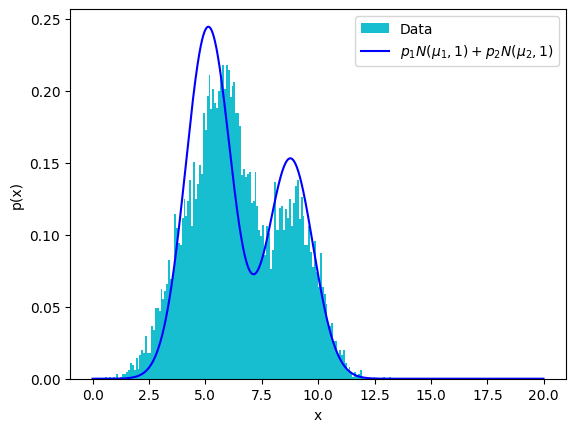

In [514]:
X = data
bins = np.linspace(np.min(data), np.max(data), 150)
Range = (np.min(data), np.max(data))

#plotting GMM
x_points = np.arange(0, 20, 0.01)
Y_val_gmm = p1*scipy.stats.norm.pdf(x_points, loc=mu1, scale=1) + p2*scipy.stats.norm.pdf(x_points, loc=mu2, scale=1)

plt.hist(X, bins=bins, color='#17becf', label='Data', density=True)
plt.plot(x_points, Y_val_gmm, color='blue', label=r'$p_1N(\mu_1, 1) + p_2N(\mu_2, 1)$')
plt.legend()
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

In [515]:
log_P_Xi_gmm = np.log(p1*scipy.stats.norm.pdf(data, loc=mu1, scale=1) + p2*scipy.stats.norm.pdf(data, loc=mu2, scale=1))
l_S_gmm = np.mean(log_P_Xi_gmm)
print(f"GMM Distribution (2-component unit variance) avg log-likelihood = {l_S_gmm}")

GMM Distribution (2-component unit variance) avg log-likelihood = -2.183018596053747


## Teaser

#### Case 1 (Not the actual distribution)
Two-component mixed gaussian with non-unit variances

In [516]:
fifth_moment = np.mean(data**5)
sixth_moment = np.mean(data**6)

def case1_teaser(params):
    p1, p2, mu1, mu2, sigma1, sigma2 = params

    if p1 < 0 or p1 > 1 or p2 < 0 or p2 > 1 or not np.isclose(p1 + p2, 1):
        return [np.inf] * 6
    
    rel1 = p1*mu1 + p2*mu2 - first_moment
    rel2 = p1*(sigma1**2 + mu1**2) + p2*(sigma2**2 + mu2**2) - second_moment
    rel3 = p1*(mu1**3 + 3*mu1*sigma1**2) + p2*(mu2**3 + 3*mu2*sigma2**2) - third_moment
    rel4 = p1*(mu1**4 + 6*mu1**2*sigma1**2 + 3*sigma1**4) + p2*(mu2**4 + 6*mu2**2*sigma2**2 + 3*sigma2**4) - fourth_moment
    rel5 = p1*(mu1**5 + 10*mu1**3*sigma1**2 + 15*mu1*sigma1**4) + p2*(mu2**5 + 10*mu2**3*sigma2**2 + 15*mu2*sigma2**4) - fifth_moment
    rel6 = p1*(16*mu1**6 + 15*mu1**4*sigma1**2 + 45*mu1**2*sigma1**4) + p2*(16*mu2**6 + 15*mu2**4*sigma2**2 + 45*mu2**2*sigma2**4) - sixth_moment

    return [rel1, rel2, rel3, rel4, rel5, rel6]

initial_guess = [0.6, 0.4, 5.5, 9, 1.2, 1.2]

result = scipy.optimize.root(case1_teaser, initial_guess, method='lm')
p1, p2, mu1, mu2, sigma1, sigma2 = result.x
print(f"p1: {p1}\np2: {p2}\nmu1: {mu1}\nmu2: {mu2}\nsigma1: {sigma1}\nsigma2: {sigma2}")

p1: 0.599990529968488
p2: 0.3999994904296494
mu1: 5.4999852619869944
mu2: 8.999998077453512
sigma1: 1.1998284689989929
sigma2: 1.1999580335588884


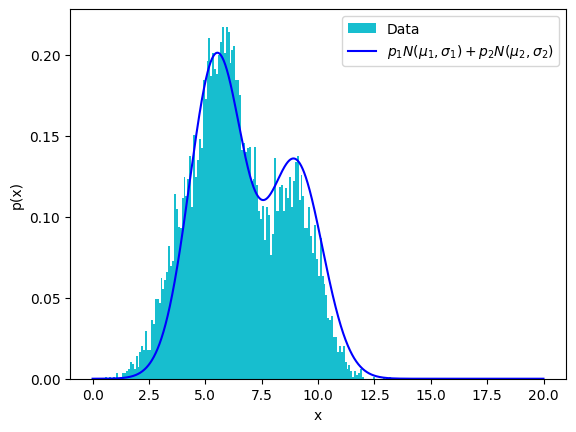

In [517]:
X = data
bins = np.linspace(np.min(data), np.max(data), 150)
Range = (np.min(data), np.max(data))

x_points = np.arange(0, 20, 0.001)
Y_val_gmm = p1*scipy.stats.norm.pdf(x_points, loc=mu1, scale=sigma1) + p2*scipy.stats.norm.pdf(x_points, loc=mu2, scale=sigma2)

plt.hist(X, bins=bins, color='#17becf', label='Data', density=True)
plt.plot(x_points, Y_val_gmm, color='blue', label=r'$p_1N(\mu_1, \sigma_1) + p_2N(\mu_2, \sigma_2)$')
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

In [518]:
log_P_Xi_gmm2sigma = np.log(p1*scipy.stats.norm.pdf(data, loc=mu1, scale=sigma1) + p2*scipy.stats.norm.pdf(data, loc=mu2, scale=sigma2))
l_S_gmm2sigma = np.mean(log_P_Xi_gmm2sigma)
print(f"GMM Distribution (Two-component with non-unit variances) avg log-likelihood = {l_S_gmm2sigma}")

GMM Distribution (Two-component with non-unit variances) avg log-likelihood = -2.1496262254467076


#### Case 2 (Actual Distribution)
Three-component Mixed Gaussian Distribution, with unit variances for each component

In [519]:
fifth_moment = np.mean(data**5)
sixth_moment = np.mean(data**6)

def case2_teaser(params):
    p1, p2, p3, mu1, mu2, mu3 = params
    if p1 < 0 or p1 > 1 or p2 < 0 or p2 > 1 or p3 < 0 or p3 > 1 or not np.isclose(p1 + p2 + p3, 1):
        return [np.inf] * 6

    rel1 = p1*mu1 + p2*mu2 + p3*mu3 - first_moment
    rel2 = p1*(1+mu1**2) + p2*(1+mu2**2) + p3*(1+mu3**2) - second_moment
    rel3 = p1*(mu1**3 + 3*mu1) + p2*(mu2**3 + 3*mu2) + p3*(mu3**3 + 3*mu3) - third_moment
    rel4 = p1*(mu1**4 + 6*mu1**2 + 3) + p2*(mu2**4 + 6*mu2**2 + 3) + p3*(mu3**4 + 6*mu3**2 + 3) - fourth_moment
    rel5 = p1*(mu1**5 + 10*mu1**3 + 15*mu1) + p2*(mu2**5 + 10*mu2**3 + 15*mu2) + p3*(mu3**5 + 10*mu3**3 + 15*mu3) - fifth_moment
    rel6 = p1*(16*mu1**6 + 15*mu1**4 + 45*mu1**2) + p2*(16*mu2**6 + 15*mu2**4 + 45*mu2**2) + p3*(16*mu3**6 + 15*mu3**4 + 45*mu3**2) - sixth_moment

    return [rel1, rel2, rel3, rel4, rel5, rel6]

initial_guess = [0.2, 0.48, 0.3, 4, 6, 9]
result = scipy.optimize.root(case2_teaser, initial_guess, method='lm')
p1, p2, p3, mu1, mu2, mu3 = result.x
print(f"p1: {p1}\np2: {p2}\np3: {p3}\nmu1: {mu1}\nmu2: {mu2}\nmu3: {mu3}")

p1: 0.2
p2: 0.48
p3: 0.3
mu1: 4.0
mu2: 6.0
mu3: 9.0


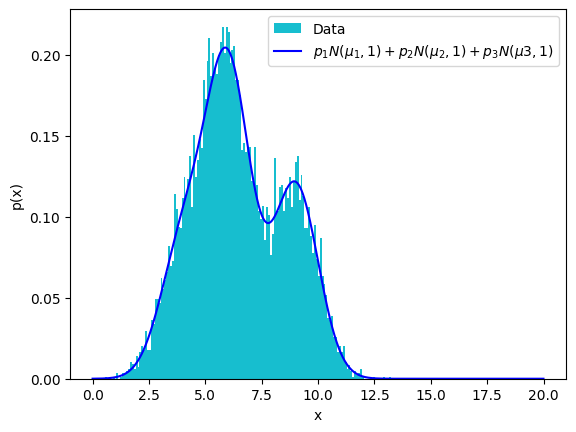

In [520]:
X = data
bins = np.linspace(np.min(data), np.max(data), 150)
Range = (np.min(data), np.max(data))

x_points = np.arange(0, 20, 0.001)
Y_val_gmm = p1*scipy.stats.norm.pdf(x_points, loc=mu1, scale=1) + p2*scipy.stats.norm.pdf(x_points, loc=mu2, scale=1) + p3*scipy.stats.norm.pdf(x_points, loc=mu3, scale=1)

plt.hist(X, bins=bins, color='#17becf', label='Data', density=True)
plt.plot(x_points, Y_val_gmm, color='blue', label=r'$p_1N(\mu_1, 1) + p_2N(\mu_2, 1) + p_3N(\mu3, 1)$')
plt.legend()
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

In [521]:
log_P_Xi_gmm3 = np.log(p1*scipy.stats.norm.pdf(data, loc=mu1, scale=1) + p2*scipy.stats.norm.pdf(data, loc=mu2, scale=1) + p3*scipy.stats.norm.pdf(data, loc=mu3, scale=1))
l_S_gmm3 = np.mean(log_P_Xi_gmm3)
print(f"GMM Distribution (Three-component with unit variances) avg log-likelihood = {l_S_gmm3}")

GMM Distribution (Three-component with unit variances) avg log-likelihood = -2.1332668038419
